In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millennials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Calculate the percentage of each group

# Percentage of Millennials
millennials_count = organized_df.loc[organized_df["Age Groups"] == "Millennials"].shape[0]
total_count = len(organized_df["Age Groups"])
millennials_percent = (millennials_count/total_count) * 100

# Percentage of GenZ
GenZ_count = organized_df.loc[organized_df["Age Groups"] == "Gen Z"].shape[0]
total_count = len(organized_df["Age Groups"])
GenZ_percent = (GenZ_count/total_count) * 100

# Percentage of GenX
GenX_count = organized_df.loc[organized_df["Age Groups"] == "Gen X"].shape[0]
total_count = len(organized_df["Age Groups"])
GenX_percent = (GenX_count/total_count) * 100

# Percentage of Baby Boomers
Baby_count = organized_df.loc[organized_df["Age Groups"] == "Baby Boomer"].shape[0]
total_count = len(organized_df["Age Groups"])
Baby_percent = (Baby_count/total_count) * 100

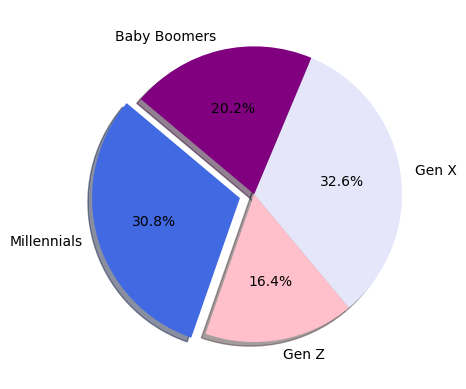

In [6]:
# Establish data for the pie chart
labels = ["Millennials", "Gen Z", "Gen X", "Baby Boomers"]
sizes = [millennials_percent, GenZ_percent, GenX_percent, Baby_percent]
colors = ['royalblue','pink','lavender','purple']
explode = (0.1, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [7]:
# organized_df.to_csv("output_data/shopping_trends.csv", index_label="Customer ID")

In [8]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_73698/1805281516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())


,Customer ID
Age Groups,
Gen Z,640
Millennials,1200
Gen X,1272
Baby Boomer,788


In [9]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [10]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [11]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_73698/1705233892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organized_df.groupby(["Age Groups"])["Gender"].value_counts()


Age Groups   Gender
Gen Z        Male      442
             Female    198
Millennials  Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [12]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1777,1778,18,Gen Z,Male,Sneakers,Footwear,44,Minnesota,L,Purple,Winter,4.7,No,Free Shipping,No,No,4,Cash,Fortnightly
849,850,23,Gen Z,Male,Jeans,Clothing,61,Missouri,S,Charcoal,Spring,4.3,Yes,Express,Yes,Yes,24,PayPal,Quarterly
2650,2651,20,Gen Z,Male,Socks,Clothing,35,Oregon,L,Maroon,Summer,4.2,No,Standard,No,No,46,Credit Card,Every 3 Months
2168,2169,23,Gen Z,Male,Handbag,Accessories,74,Connecticut,M,Beige,Spring,4.1,No,Next Day Air,No,No,32,Cash,Quarterly
1073,1074,22,Gen Z,Male,Scarf,Accessories,96,California,XL,Purple,Spring,4.0,No,Store Pickup,Yes,Yes,33,Credit Card,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2197,25,Gen Z,Male,Dress,Clothing,58,Vermont,M,Gray,Spring,4.8,No,Next Day Air,No,No,31,PayPal,Weekly
2584,2585,26,Gen Z,Male,Socks,Clothing,30,Florida,L,Blue,Summer,2.9,No,Store Pickup,No,No,26,Bank Transfer,Bi-Weekly
1418,1419,18,Gen Z,Male,Shirt,Clothing,75,Alabama,M,Violet,Summer,4.1,No,2-Day Shipping,Yes,Yes,23,Venmo,Every 3 Months
1854,1855,25,Gen Z,Male,Sweater,Clothing,61,Kentucky,M,Teal,Spring,3.8,No,Express,No,No,49,Credit Card,Annually


In [13]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2149,2150,38,Millennials,Male,Sandals,Footwear,21,Hawaii,L,Orange,Winter,4.0,No,Standard,No,No,1,Bank Transfer,Weekly
1884,1885,27,Millennials,Male,Shorts,Clothing,30,Arizona,S,Pink,Summer,4.3,No,Next Day Air,No,No,15,Bank Transfer,Bi-Weekly
1108,1109,27,Millennials,Male,Shorts,Clothing,25,Nebraska,M,Teal,Fall,2.8,No,Standard,Yes,Yes,50,Cash,Fortnightly
1398,1399,30,Millennials,Male,Dress,Clothing,45,Texas,M,Cyan,Summer,2.5,No,Free Shipping,Yes,Yes,25,Credit Card,Weekly
712,713,42,Millennials,Male,Blouse,Clothing,81,New Hampshire,XL,Black,Summer,3.8,Yes,Next Day Air,Yes,Yes,36,Bank Transfer,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1065,34,Millennials,Male,Hat,Accessories,28,Wyoming,M,Violet,Spring,3.5,No,Express,Yes,Yes,42,Credit Card,Every 3 Months
1582,1583,28,Millennials,Male,Belt,Accessories,41,Hawaii,L,Red,Spring,2.5,No,Next Day Air,Yes,Yes,39,Cash,Monthly
55,56,40,Millennials,Male,Jacket,Outerwear,28,South Carolina,M,Lavender,Winter,3.0,Yes,2-Day Shipping,Yes,Yes,49,Credit Card,Annually
1993,1994,32,Millennials,Male,Blouse,Clothing,96,Arkansas,S,Purple,Spring,5.0,No,Express,No,No,17,Cash,Weekly


In [14]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2554,2555,51,Gen X,Male,Jewelry,Accessories,68,Kansas,M,Gray,Summer,4.3,No,Store Pickup,No,No,49,Debit Card,Bi-Weekly
1389,1390,59,Gen X,Male,Scarf,Accessories,72,Illinois,L,Orange,Fall,2.6,No,Store Pickup,Yes,Yes,8,Debit Card,Fortnightly
74,75,49,Gen X,Male,Gloves,Accessories,58,Indiana,L,Violet,Spring,4.5,Yes,Express,Yes,Yes,3,Cash,Monthly
2120,2121,53,Gen X,Male,Scarf,Accessories,98,Missouri,S,Red,Fall,3.1,No,Next Day Air,No,No,38,PayPal,Quarterly
197,198,59,Gen X,Male,Scarf,Accessories,78,South Carolina,M,Black,Fall,3.2,Yes,2-Day Shipping,Yes,Yes,41,Credit Card,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,423,47,Gen X,Male,Pants,Clothing,59,Minnesota,M,Purple,Fall,3.1,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
2523,2524,43,Gen X,Male,Handbag,Accessories,24,New Jersey,S,Cyan,Spring,3.4,No,Express,No,No,21,Bank Transfer,Annually
2012,2013,48,Gen X,Male,Jeans,Clothing,53,Nevada,L,Green,Fall,3.2,No,Store Pickup,No,No,5,Cash,Fortnightly
730,731,48,Gen X,Male,Boots,Footwear,25,Massachusetts,M,Indigo,Summer,3.9,Yes,Standard,Yes,Yes,28,Venmo,Fortnightly


In [15]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
973,974,60,Baby Boomer,Male,Jacket,Outerwear,75,Colorado,M,Teal,Fall,3.5,Yes,2-Day Shipping,Yes,Yes,30,Bank Transfer,Quarterly
1184,1185,63,Baby Boomer,Male,Belt,Accessories,73,South Carolina,S,Indigo,Fall,3.4,No,Express,Yes,Yes,19,Credit Card,Annually
2040,2041,69,Baby Boomer,Male,Jewelry,Accessories,25,South Carolina,XL,Gray,Spring,2.9,No,Free Shipping,No,No,42,Venmo,Quarterly
1372,1373,64,Baby Boomer,Male,Blouse,Clothing,61,Michigan,M,Gray,Fall,4.0,No,2-Day Shipping,Yes,Yes,44,PayPal,Bi-Weekly
1831,1832,62,Baby Boomer,Male,Blouse,Clothing,71,Maine,M,Cyan,Summer,3.3,No,Free Shipping,No,No,5,Bank Transfer,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,64,Baby Boomer,Male,Hat,Accessories,84,West Virginia,L,Red,Summer,4.0,Yes,Express,Yes,Yes,32,Bank Transfer,Annually
2066,2067,64,Baby Boomer,Male,Sneakers,Footwear,92,Illinois,M,Olive,Fall,4.7,No,Store Pickup,No,No,44,Debit Card,Fortnightly
1518,1519,68,Baby Boomer,Male,Belt,Accessories,73,New York,M,Yellow,Winter,4.1,No,Next Day Air,Yes,Yes,14,Venmo,Fortnightly
553,554,63,Baby Boomer,Male,Sunglasses,Accessories,59,Florida,M,White,Winter,3.2,Yes,Express,Yes,Yes,15,Credit Card,Quarterly


In [16]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3610,3611,18,Gen Z,Female,Jacket,Outerwear,86,Texas,XL,Green,Fall,4.8,No,2-Day Shipping,No,No,23,Bank Transfer,Fortnightly
2706,2707,24,Gen Z,Female,Shoes,Footwear,40,Alabama,S,Blue,Spring,3.1,No,Express,No,No,48,Debit Card,Quarterly
3654,3655,21,Gen Z,Female,Jewelry,Accessories,98,Arkansas,M,Green,Winter,3.3,No,Next Day Air,No,No,10,Credit Card,Annually
3570,3571,23,Gen Z,Female,Dress,Clothing,97,Louisiana,XL,Teal,Winter,4.7,No,Standard,No,No,32,Debit Card,Annually
3014,3015,24,Gen Z,Female,T-shirt,Clothing,65,Utah,M,Maroon,Spring,4.5,No,Express,No,No,38,PayPal,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,3239,25,Gen Z,Female,Sneakers,Footwear,84,Wyoming,XL,Teal,Fall,3.4,No,2-Day Shipping,No,No,37,Cash,Quarterly
2880,2881,19,Gen Z,Female,Skirt,Clothing,61,Florida,L,Beige,Winter,4.8,No,Store Pickup,No,No,43,PayPal,Quarterly
3776,3777,19,Gen Z,Female,Sneakers,Footwear,25,Alaska,L,Olive,Spring,4.1,No,Standard,No,No,10,Credit Card,Fortnightly
3437,3438,22,Gen Z,Female,Jacket,Outerwear,62,Oklahoma,S,Green,Winter,3.5,No,2-Day Shipping,No,No,50,PayPal,Annually


In [17]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3158,3159,30,Millennials,Female,Jewelry,Accessories,77,Mississippi,M,Gray,Winter,4.9,No,2-Day Shipping,No,No,44,Credit Card,Monthly
3606,3607,41,Millennials,Female,Sandals,Footwear,90,Minnesota,XL,Purple,Fall,4.8,No,Express,No,No,41,Venmo,Annually
3724,3725,30,Millennials,Female,Gloves,Accessories,71,Colorado,L,Green,Winter,3.1,No,Express,No,No,18,Bank Transfer,Annually
3775,3776,41,Millennials,Female,Belt,Accessories,63,South Dakota,S,Pink,Spring,2.7,No,2-Day Shipping,No,No,45,Cash,Quarterly
3090,3091,29,Millennials,Female,Shirt,Clothing,36,Texas,M,Peach,Summer,4.9,No,Store Pickup,No,No,15,Bank Transfer,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,3381,41,Millennials,Female,Dress,Clothing,52,North Dakota,L,Blue,Summer,3.8,No,Standard,No,No,6,PayPal,Every 3 Months
3015,3016,37,Millennials,Female,Scarf,Accessories,21,Wyoming,XL,Lavender,Spring,2.8,No,Express,No,No,27,Bank Transfer,Bi-Weekly
3753,3754,39,Millennials,Female,Sunglasses,Accessories,26,Louisiana,S,Turquoise,Winter,4.2,No,Next Day Air,No,No,22,Bank Transfer,Fortnightly
2972,2973,31,Millennials,Female,Jacket,Outerwear,39,New York,S,Indigo,Fall,4.2,No,Free Shipping,No,No,11,Venmo,Every 3 Months


In [18]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3501,3502,53,Gen X,Female,Shoes,Footwear,87,Nebraska,M,Silver,Fall,4.8,No,Standard,No,No,43,Bank Transfer,Weekly
3510,3511,49,Gen X,Female,Sneakers,Footwear,96,Pennsylvania,S,Orange,Fall,4.9,No,2-Day Shipping,No,No,14,Venmo,Monthly
3062,3063,51,Gen X,Female,Backpack,Accessories,96,California,L,Green,Fall,3.3,No,Standard,No,No,39,PayPal,Monthly
2684,2685,46,Gen X,Female,Dress,Clothing,45,Washington,M,Gray,Summer,4.7,No,Free Shipping,No,No,42,Credit Card,Bi-Weekly
2791,2792,43,Gen X,Female,Gloves,Accessories,60,Iowa,M,Yellow,Fall,2.8,No,Express,No,No,14,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,3215,53,Gen X,Female,Skirt,Clothing,78,Washington,M,Yellow,Spring,3.1,No,Free Shipping,No,No,6,Debit Card,Annually
2956,2957,52,Gen X,Female,Dress,Clothing,88,Montana,M,Olive,Fall,3.7,No,Standard,No,No,30,Venmo,Monthly
3079,3080,48,Gen X,Female,Belt,Accessories,31,Wyoming,M,Maroon,Fall,4.0,No,Store Pickup,No,No,4,Bank Transfer,Annually
3825,3826,49,Gen X,Female,Shorts,Clothing,35,Hawaii,L,Green,Fall,4.1,No,Express,No,No,47,Debit Card,Fortnightly


In [19]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2991,2992,66,Baby Boomer,Female,Dress,Clothing,71,Utah,L,Green,Summer,3.9,No,Standard,No,No,7,PayPal,Bi-Weekly
3457,3458,64,Baby Boomer,Female,Jewelry,Accessories,87,Maryland,M,Gray,Summer,3.0,No,Express,No,No,29,Cash,Fortnightly
3292,3293,62,Baby Boomer,Female,Handbag,Accessories,23,Missouri,L,Gray,Spring,4.9,No,Standard,No,No,18,Bank Transfer,Fortnightly
2879,2880,62,Baby Boomer,Female,Blouse,Clothing,57,North Dakota,XL,Turquoise,Winter,4.9,No,Free Shipping,No,No,31,Venmo,Annually
3107,3108,65,Baby Boomer,Female,Blouse,Clothing,31,Hawaii,L,Gray,Winter,4.6,No,Standard,No,No,18,Credit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,3097,69,Baby Boomer,Female,Shirt,Clothing,63,Kansas,L,White,Winter,3.5,No,Next Day Air,No,No,20,Bank Transfer,Monthly
3458,3459,68,Baby Boomer,Female,Jewelry,Accessories,37,West Virginia,L,Violet,Spring,3.4,No,Standard,No,No,24,Venmo,Quarterly
3793,3794,62,Baby Boomer,Female,Sunglasses,Accessories,20,Delaware,M,Pink,Fall,4.0,No,Standard,No,No,46,Bank Transfer,Annually
3081,3082,64,Baby Boomer,Female,Sneakers,Footwear,44,Vermont,L,Pink,Winter,4.9,No,Next Day Air,No,No,11,Credit Card,Weekly


In [20]:
GenZ_male["Review Rating"]

1777    4.7
849     4.3
2650    4.2
2168    4.1
1073    4.0
       ... 
2196    4.8
2584    2.9
1418    4.1
1854    3.8
1928    3.7
Name: Review Rating, Length: 198, dtype: float64

In [21]:
Mill_male["Review Rating"]

2149    4.0
1884    4.3
1108    2.8
1398    2.5
712     3.8
       ... 
1064    3.5
1582    2.5
55      3.0
1993    5.0
1828    3.9
Name: Review Rating, Length: 198, dtype: float64

In [22]:
GenX_male["Review Rating"]

2554    4.3
1389    2.6
74      4.5
2120    3.1
197     3.2
       ... 
422     3.1
2523    3.4
2012    3.2
730     3.9
978     2.5
Name: Review Rating, Length: 198, dtype: float64

In [23]:
Baby_male["Review Rating"]

973     3.5
1184    3.4
2040    2.9
1372    4.0
1831    3.3
       ... 
120     4.0
2066    4.7
1518    4.1
553     3.2
366     3.5
Name: Review Rating, Length: 198, dtype: float64

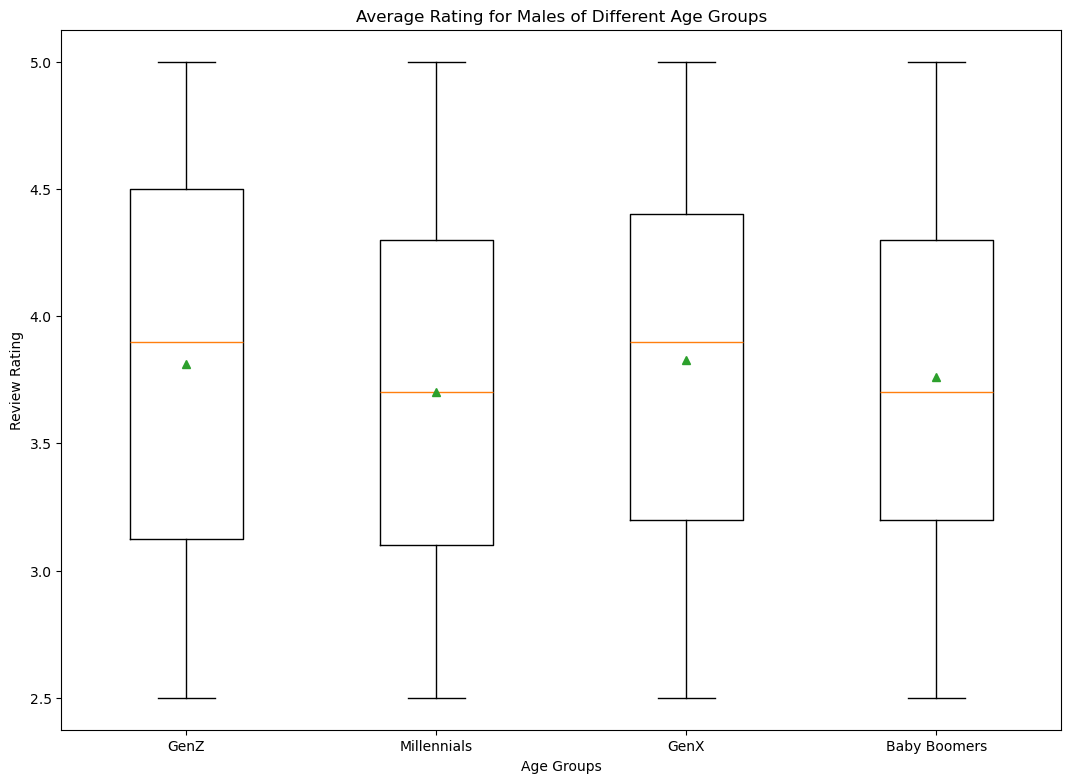

In [24]:
# Box and Whisker plot for Males of different Age Group and Review Rating

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Males within the Baby Boomers Age Group gave a the lowest median Review Rating, while males within the Millennials Age Group gave the lowest median Review Rating. The median Review Ratings for Males within GenX and GenZ are roughly the same. GenZ, Millennials, and GenX have roughly the same average review rating, while Baby Boomers has the lowest average review rating.

In [25]:
# Extract individual groups
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male"),"Review Rating"]
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male"),"Review Rating"]
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male"),"Review Rating"]
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male"),"Review Rating"]

#Performn the ANOVA
stats.f_oneway(GenZ_male, Mill_male, GenX_male, Baby_male)

F_onewayResult(statistic=2.273643196968091, pvalue=0.07808768548651818)

Analysis: Since the p-value is greater than the alpha-value of 0.05, we can accept the null hypothesis. 
Therefore, the average review rating for males of different age groups sampled is the same as the average 
review rating for the population of males of different age groups. 

In [26]:
GenZ_female["Review Rating"]

3610    4.8
2706    3.1
3654    3.3
3570    4.7
3014    4.5
       ... 
3238    3.4
2880    4.8
3776    4.1
3437    3.5
2699    3.6
Name: Review Rating, Length: 198, dtype: float64

In [27]:
Mill_female["Review Rating"]

3158    4.9
3606    4.8
3724    3.1
3775    2.7
3090    4.9
       ... 
3380    3.8
3015    2.8
3753    4.2
2972    4.2
2902    4.6
Name: Review Rating, Length: 198, dtype: float64

In [28]:
GenX_female["Review Rating"]

3501    4.8
3510    4.9
3062    3.3
2684    4.7
2791    2.8
       ... 
3214    3.1
2956    3.7
3079    4.0
3825    4.1
2785    2.9
Name: Review Rating, Length: 198, dtype: float64

In [29]:
Baby_female["Review Rating"]

2991    3.9
3457    3.0
3292    4.9
2879    4.9
3107    4.6
       ... 
3096    3.5
3458    3.4
3793    4.0
3081    4.9
2778    3.2
Name: Review Rating, Length: 198, dtype: float64

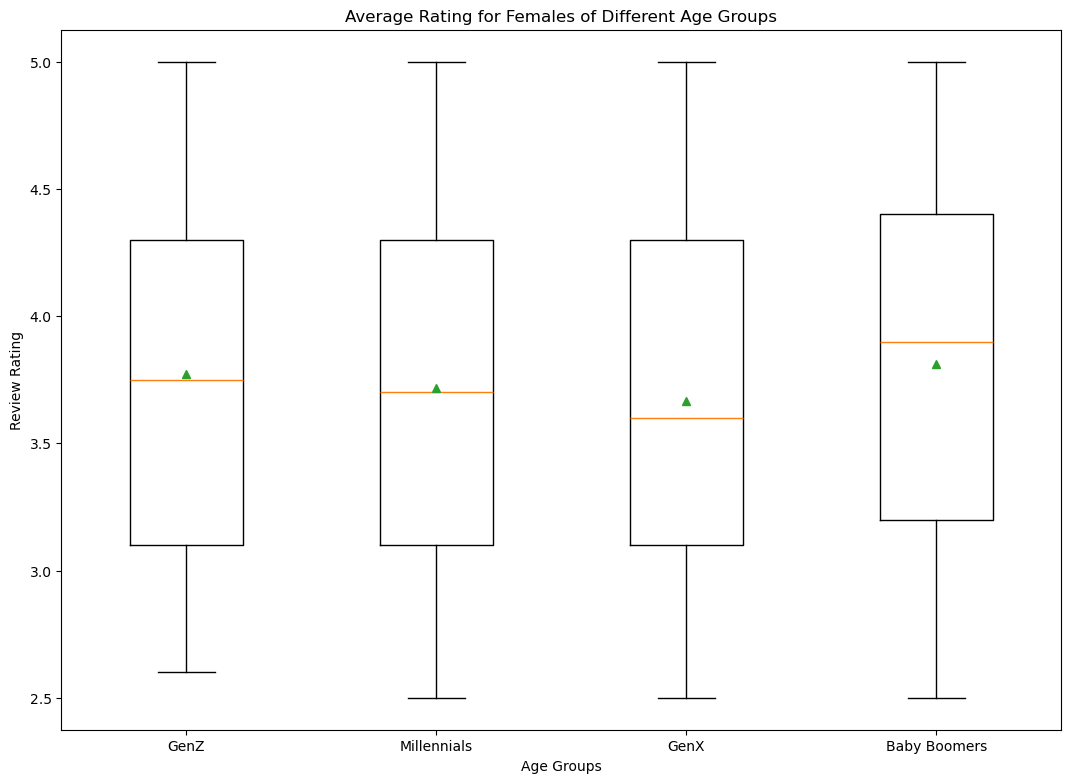

In [30]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Females within the Baby Boomers Age Group gave a higher Review Rating on average, while females within the Millennials Age Group gave the lowest Review Rating on average. Females within GenX Age Group gave an average Review Rating slightly higher than that of GenZ. 

In [31]:
# Extract individual groups
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female"),"Review Rating"]
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female"),"Review Rating"]
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female"),"Review Rating"]
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female"),"Review Rating"]

#Performn the ANOVA
stats.f_oneway(GenZ_female, Mill_female, GenX_female, Baby_female)

F_onewayResult(statistic=1.0678780644328576, pvalue=0.3616895713139034)

Analysis: Since the p-value is greater than the alpha-value of 0.05, we can accept the null hypothesis. Therefore, the average review rating for females of different age groups sampled is the same as the average review rating for the population of females of different age groups. 

In [32]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [33]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [34]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [35]:
# Filter the DataFrame down only to those columns to chart
fall_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
fall_category_counts = fall_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
fall_category_counts = fall_category_counts.unstack()

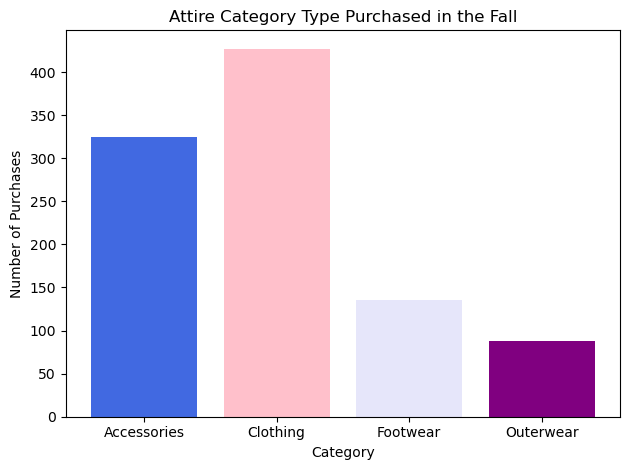

In [36]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(fall_category_counts.T.index, fall_category_counts.T["Fall"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: During the Fall, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [37]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [38]:
# Filter the DataFrame down only to those columns to chart
winter_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
winter_category_counts = winter_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
winter_category_counts = winter_category_counts.unstack()

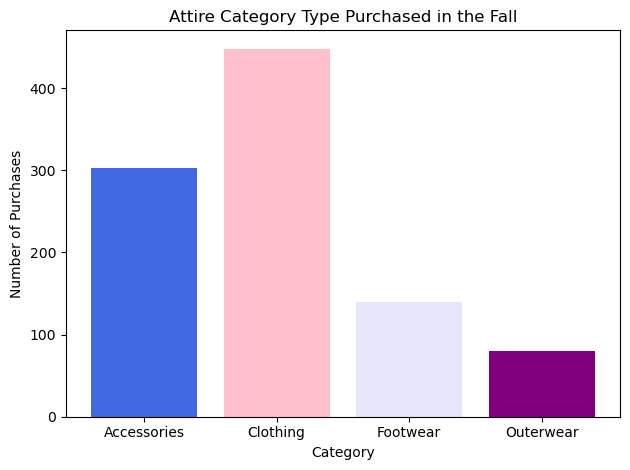

In [39]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(winter_category_counts.T.index, winter_category_counts.T["Winter"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: Similar to the Fall, during the Winter, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [40]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [41]:
# Filter the DataFrame down only to those columns to chart
spring_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
spring_category_counts = spring_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
spring_category_counts = spring_category_counts.unstack()

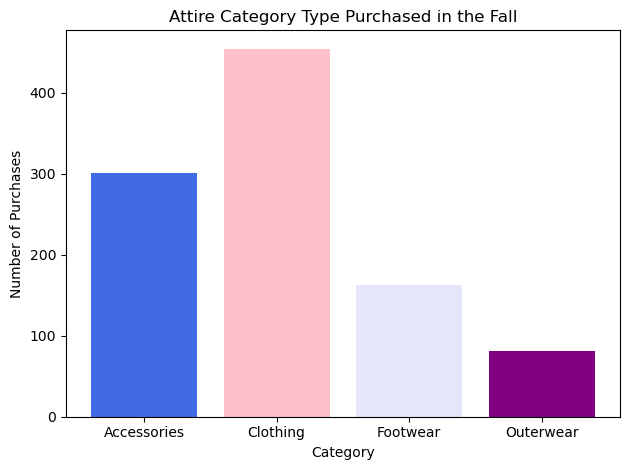

In [42]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(spring_category_counts.T.index, spring_category_counts.T["Spring"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: Similar to the Fall, during the Winter, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [43]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [44]:
# Filter the DataFrame down only to those columns to chart
summer_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
summer_category_counts = summer_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
summer_category_counts = summer_category_counts.unstack()

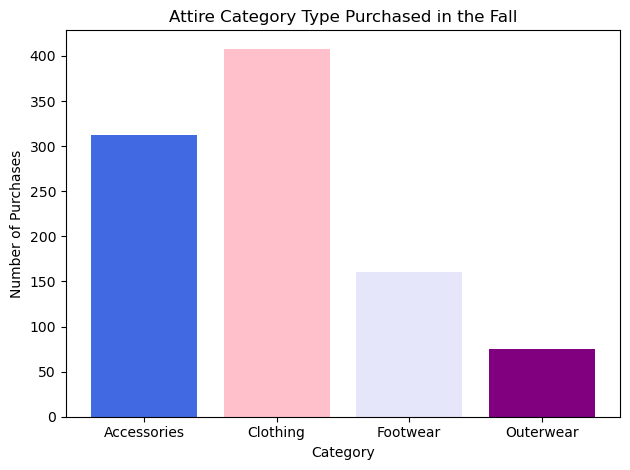

In [45]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(summer_category_counts.T.index, summer_category_counts.T["Summer"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: The Summer's Categories were roughly the same as the other three seasons, whereby Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear came in third with over two times the number of purchases of Outwear.

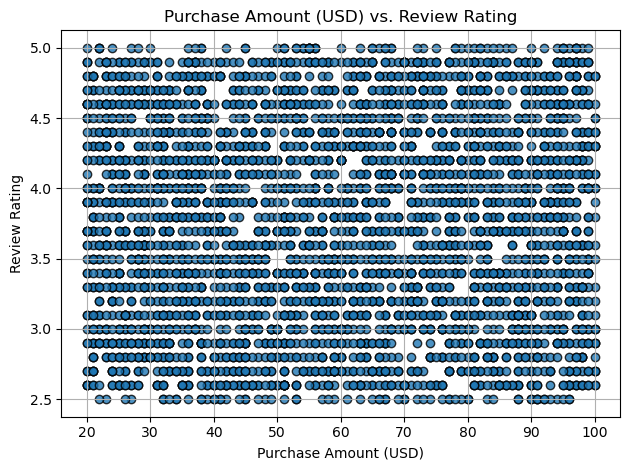

In [46]:
# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Review Rating"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.title("Purchase Amount (USD) vs. Review Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Review Rating.

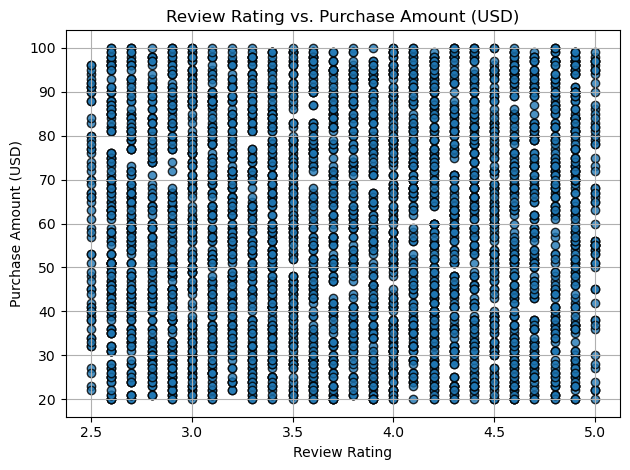

In [47]:
# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Review Rating"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.title("Review Rating vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between review rating and purchase amount (USD).

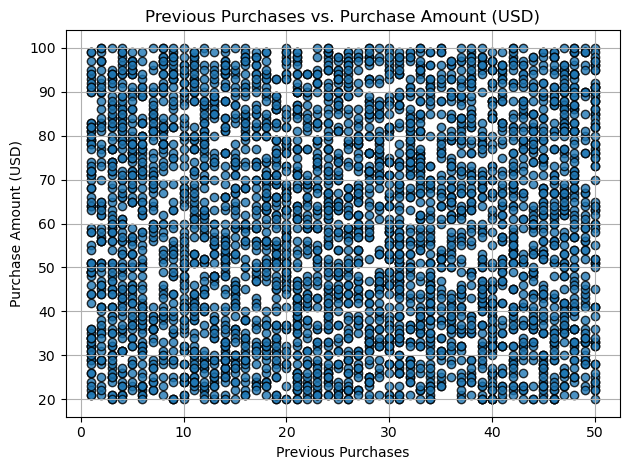

In [48]:
# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Previous Purchases"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Previous Purchases vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Previous Purchases and Purchase Amount (USD).

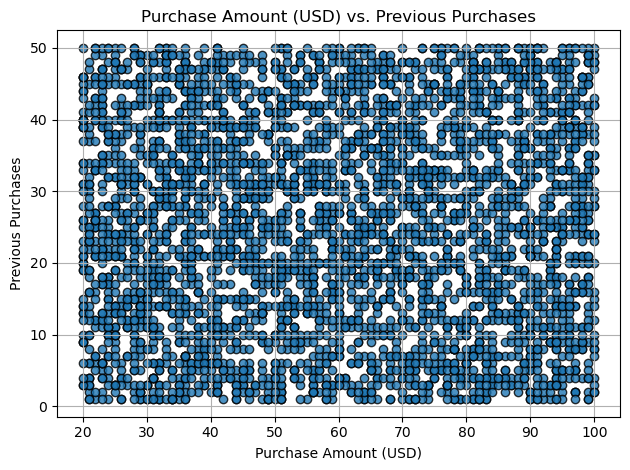

In [49]:
# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Previous Purchases"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Purchase Amount (USD) vs. Previous Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Previous Purchases.

## Which age demographic spends the most money?

In [50]:
average_spent_by_age_group = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean().reset_index()
average_spent_by_age_group

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_73698/2913558160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spent_by_age_group = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean().reset_index()


,Age Groups,Purchase Amount (USD)
0,Gen Z,60.690625
1,Millennials,59.390833
2,Gen X,59.808176
3,Baby Boomer,59.510152


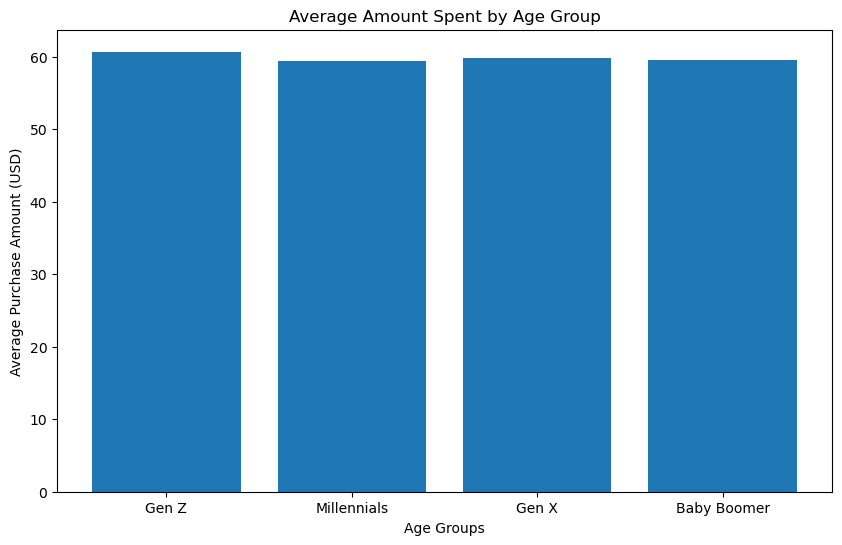

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(average_spent_by_age_group['Age Groups'], average_spent_by_age_group["Purchase Amount (USD)"])
plt.xlabel('Age Groups')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Amount Spent by Age Group')
plt.show()

Based on our findings, we can conclude that all age groups spend roughly the same amount, however Gen Z has a slight advantage over the other three age groups.

In [52]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

## How frequently do specific age demographics shop? (bi-weekly, bi-monthly, ect)

In [53]:
shopping_frequency = organized_df.pivot_table(index='Frequency of Purchases', columns='Age Groups', aggfunc='size', fill_value=0)
shopping_frequency

Age Groups,Gen Z,Millennials,Gen X,Baby Boomer
Frequency of Purchases,,,,
Annually,102,169,170,131
Bi-Weekly,99,165,184,99
Every 3 Months,100,186,185,113
Fortnightly,94,164,180,104
Monthly,80,179,189,105
Quarterly,89,161,185,128
Weekly,76,176,179,108


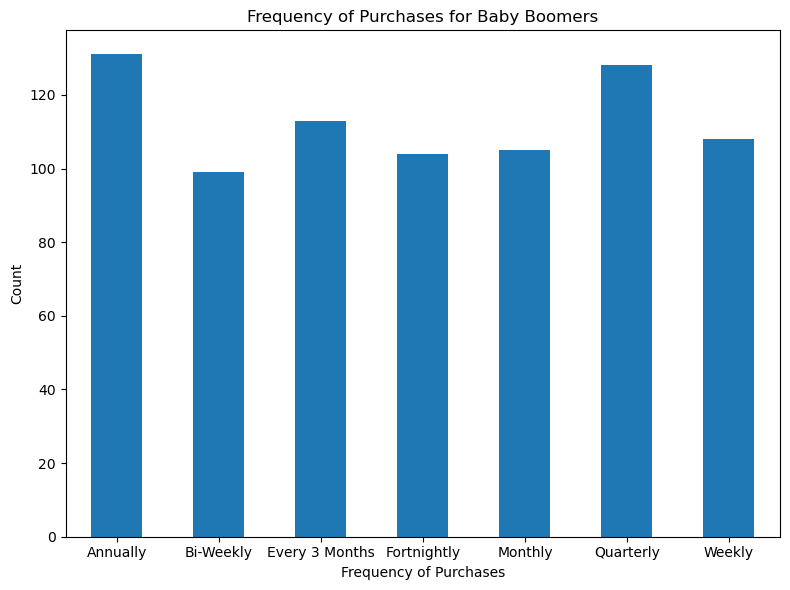

In [54]:
baby_boomer_data = shopping_frequency.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Baby Boomers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Baby Boomers's most often frequency of purchase appears to be annually (once a year), while their least frequency of purchase is bi-weekly (twice a week).

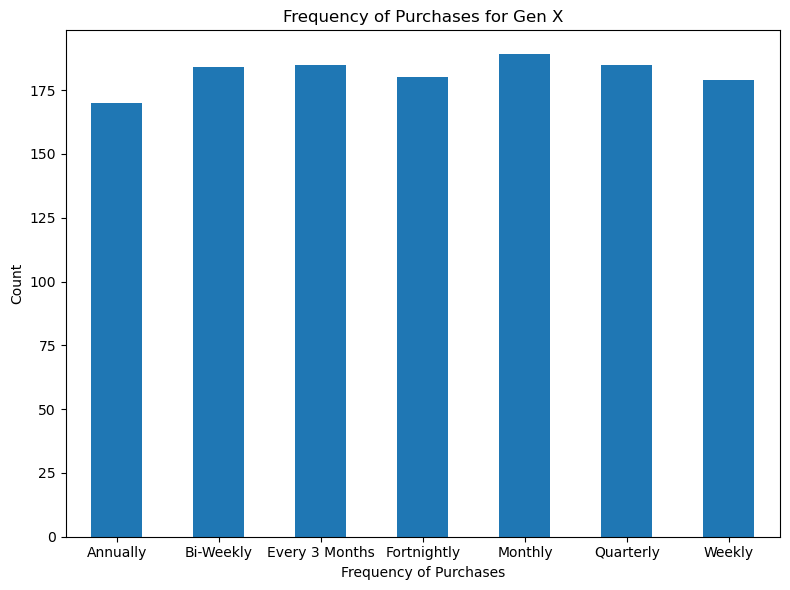

In [55]:
gen_x_data = shopping_frequency.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
gen_x_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen X')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gen X's most often frequency of purchase appears to be monthly (once a month), while their least frequency of purchase is anually (once a year).

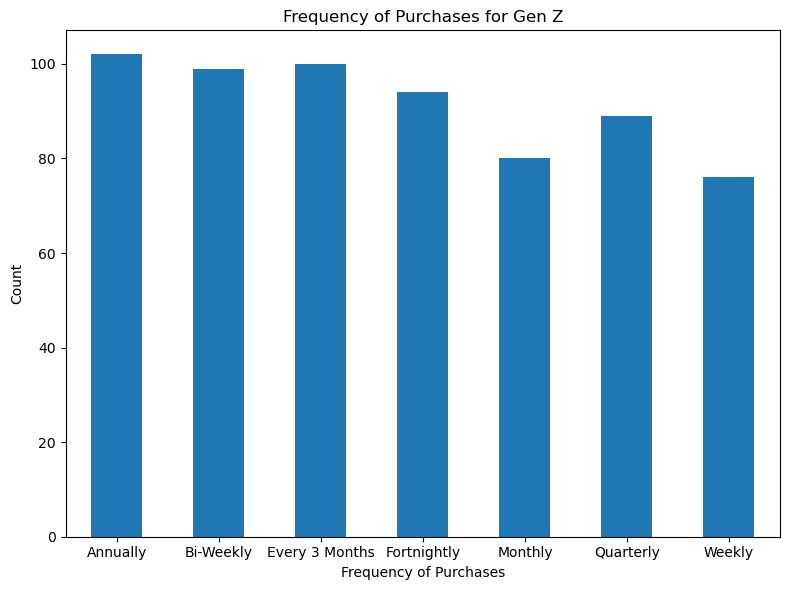

In [56]:
gen_z_data = shopping_frequency.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
gen_z_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen Z')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gen Z's most often frequency of purchase appears to be annually (once a year), while their least frequency of purchase is weekly (once a week).

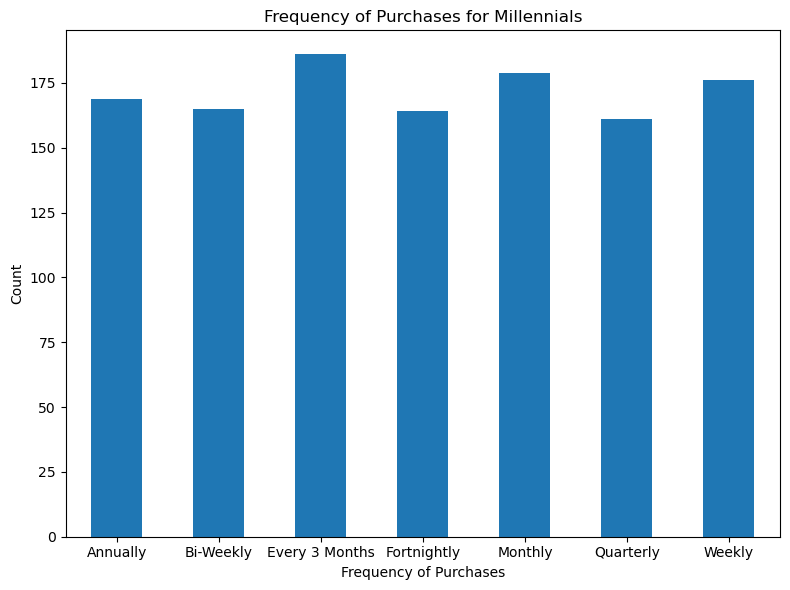

In [57]:
millennial_data = shopping_frequency.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
millennial_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Millennials')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Millennials's most often frequency of purchase appears to be every 3 months, while their least frequency of purchase is quarterly (four times a year).

In [58]:
frequency_counts = organized_df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']
print(frequency_counts)

  Frequency of Purchases  Count
0         Every 3 Months    584
1               Annually    572
2              Quarterly    563
3                Monthly    553
4              Bi-Weekly    547
5            Fortnightly    542
6                 Weekly    539


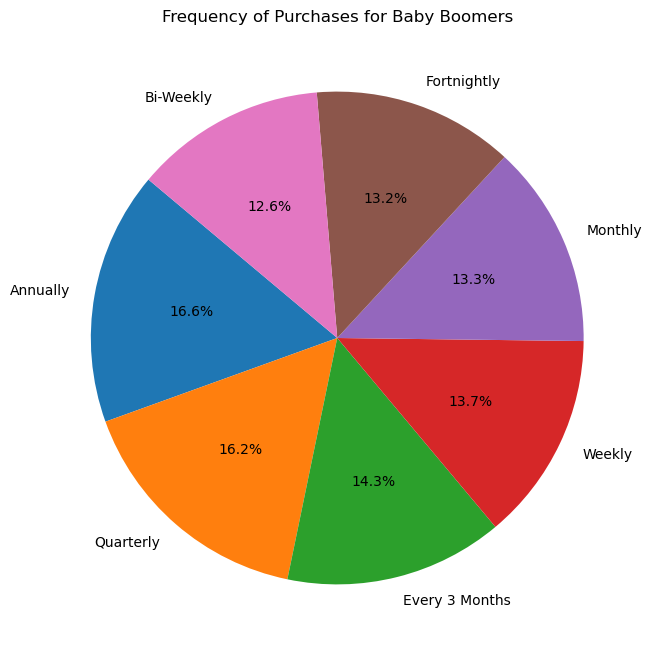

In [59]:
baby_boomers_df = organized_df[shopping_df['Age Groups'] == 'Baby Boomer']
baby_boomers_frequency_counts = baby_boomers_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(baby_boomers_frequency_counts, labels=baby_boomers_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Baby Boomers')
plt.show()

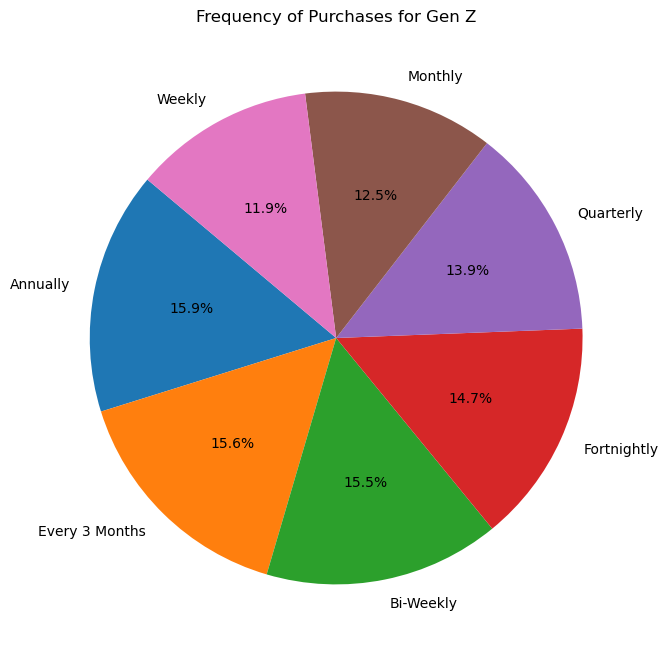

In [60]:
gen_z_df = organized_df[organized_df['Age Groups'] == 'Gen Z']
gen_z_frequency_counts = gen_z_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_z_frequency_counts, labels=gen_z_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen Z')
plt.show()

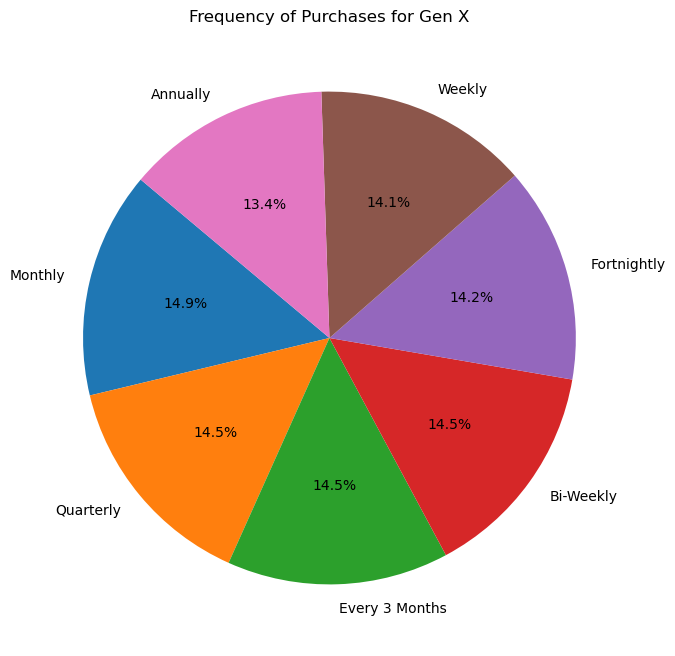

In [61]:
gen_x_df = organized_df[organized_df['Age Groups'] == 'Gen X']
gen_x_frequency_counts = gen_x_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_x_frequency_counts, labels=gen_x_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen X')
plt.show()

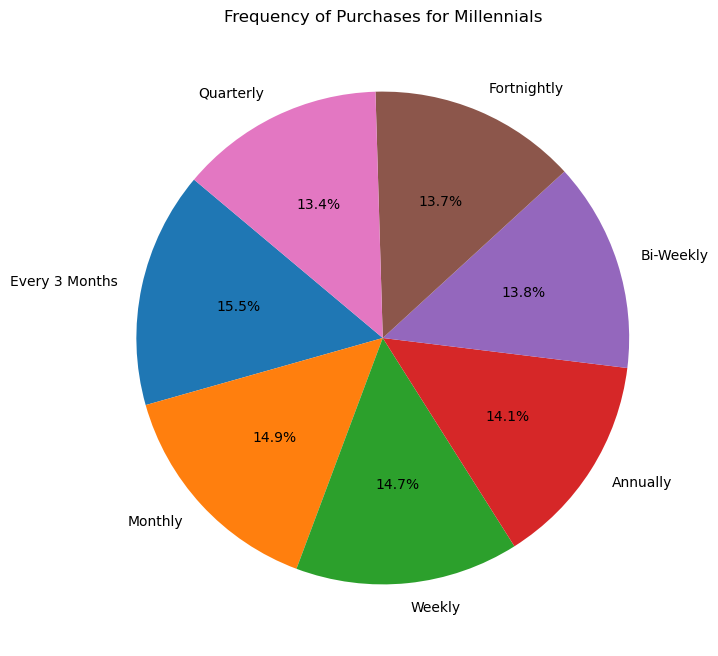

In [62]:
millennial_df = organized_df[organized_df['Age Groups'] == 'Millennials']
millennial_frequency_counts = millennial_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(millennial_frequency_counts, labels=millennial_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Millennials')
plt.show()

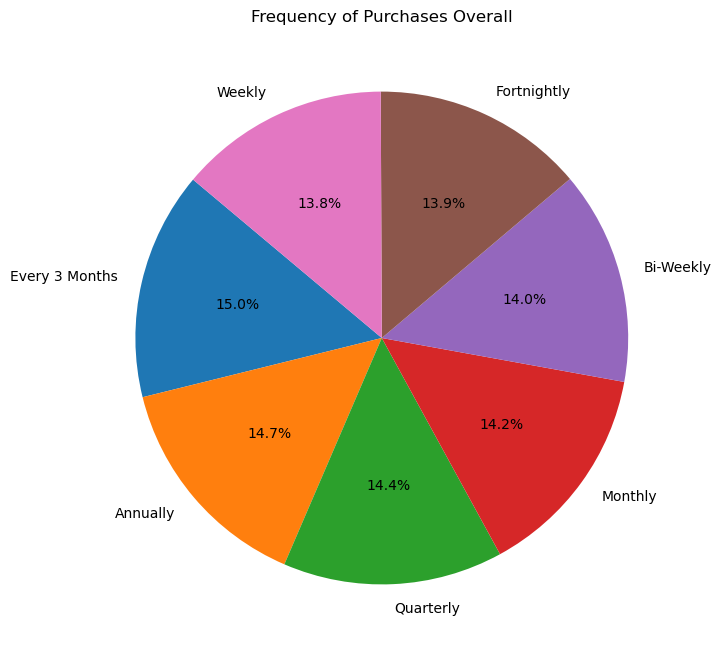

In [63]:
overall_frequency_counts = organized_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(overall_frequency_counts, labels=overall_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases Overall')
plt.show()

Overall, across all customers combined, the most frequent frequency of purchase is every 3 months, while the least frequent frequency of purchase is weekly (once a week).

## Is there a correlation between the color of clothes purchased and the season? 

In [64]:
GenZ_male["Color"]

KeyError: 'Color'

In [ ]:
organized_df["Age Groups"]

In [ ]:
organized_df["Color"]

In [ ]:
organized_df['Color'].unique()

In [ ]:
color_data = organized_df['Color']

color_organized_df = pd.DataFrame(color_data)

def classify_text(color_data):
    if color_data in ['Gray', 'Silver', 'Beige']:
        return 'Gray'
    elif color_data in ['Red', 'Maroon']:
        return 'Red'
    elif color_data in ['Blue', 'Teal', 'Cyan', 'Turquoise']:
        return 'Blue'
    elif color_data in ['White']:
        return 'White'
    elif color_data in ['Black', 'Charcoal']:
        return 'Black'
    elif color_data in ['Pink', 'Magenta']:
        return 'Pink'
    elif color_data in ['Purple', 'Violet', 'Lavender', 'Indigo']:
        return 'Purple'
    elif color_data in ['Green', 'Olive']:
        return 'Green'
    elif color_data in ['Yellow', 'Gold']:
        return 'Yellow'
    elif color_data in ['Orange', 'Peach']:
        return 'Orange'
    else:
        return 'Brown'
organized_df['Color Classifications'] = color_data.apply(classify_text) 

color_organized_df = organized_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Color Classifications", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
color_organized_df


In [ ]:
# Determine the most frequently purchased item color overall
color_frequency_counts = color_organized_df['Color Classifications'].value_counts().reset_index()
color_frequency_counts.columns = ['Color Classifications', 'Count']
print(color_frequency_counts)

In [ ]:
# Color preference by age demographic
color_preference = color_organized_df.pivot_table(index='Color Classifications', columns='Age Groups', aggfunc='size', fill_value=0)
color_preference

In [ ]:
# Plot the numbers of items purchased for each color for the Baby Boomer generation
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
baby_boomer_data = color_preference.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6),)
#ax.bar(baby_boomer_data.T.index, baby_boomer_da.T["Fall"], color = color)
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Baby Boomers')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Baby Boomers.

In [ ]:
# Plot the numbers of items purchased for each color for the Gen X generation
Gen_X_data = color_preference.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Gen X')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen X.

In [ ]:
# Plot the numbers of items purchased for each color for the Milennial generation
Millennial_data = color_preference.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Millennials')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among millennials.

In [ ]:
# Determine the frequency of color item purchases for Gen Z
Gen_Z_data = color_preference.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Gen Z')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen Z.

In [ ]:
# Percentage of Black
black_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Black"].shape[0]
total_count = len(organized_df["Color Classifications"])
black_percent = (black_count/total_count) * 100
print(black_percent)

# Percentage of Blue
blue_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Blue"].shape[0]
total_count = len(organized_df["Color Classifications"])
blue_percent = (blue_count/total_count) * 100

# Percentage of Brown
brown_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Brown"].shape[0]
total_count = len(organized_df["Color Classifications"])
brown_percent = (brown_count/total_count) * 100

# Percentage of Gray
gray_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Gray"].shape[0]
total_count = len(organized_df["Color Classifications"])
gray_percent = (gray_count/total_count) * 100

# Percentage of Gray
green_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Green"].shape[0]
total_count = len(organized_df["Color Classifications"])
green_percent = (green_count/total_count) * 100

# Percentage of Orange
orange_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Orange"].shape[0]
total_count = len(organized_df["Color Classifications"])
orange_percent = (orange_count/total_count) * 100

# Percentage of Pink
pink_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Pink"].shape[0]
total_count = len(organized_df["Color Classifications"])
pink_percent = (pink_count/total_count) * 100

# Percentage of Purple
purple_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Purple"].shape[0]
total_count = len(organized_df["Color Classifications"])
purple_percent = (purple_count/total_count) * 100

# Percentage of Red
red_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Red"].shape[0]
total_count = len(organized_df["Color Classifications"])
red_percent = (red_count/total_count) * 100

# Percentage of White
white_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "White"].shape[0]
total_count = len(organized_df["Color Classifications"])
white_percent = (white_count/total_count) * 100

# Percentage of Yellow
yellow_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Yellow"].shape[0]
total_count = len(organized_df["Color Classifications"])
yellow_percent = (yellow_count/total_count) * 100

In [ ]:
# Establish data for the pie chart
labels = ["Black", "Blue", "Brown", "Gray", "Green", "Orange", "Pink", "Purple", "Red", "White", "Yellow"]
sizes = [black_percent, blue_percent, brown_percent, gray_percent, green_percent, orange_percent, pink_percent, purple_percent, red_percent, white_percent, yellow_percent]
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

This pie chart serves to portray the relative percentages of each color to be purchased by the sample overall. Further, according to the chart, blue and purple are the most common colors to be purchased, and white and brown are the least.

## What type of color item is purchased most for each season?

In [ ]:
color_organized_df.groupby(["Color Classifications"])["Season"].value_counts()

In [ ]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

In [ ]:
# Filter the DataFrame down only to those columns to chart
fall_color = fall_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
fall_color_counts = fall_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
fall_color_counts = fall_color_counts.unstack()

In [ ]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(fall_color_counts.T.index, fall_color_counts.T["Fall"], color = color)
plt.title("Different Colors Purchased in the Fall")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Fall. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least.

In [ ]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Winter")])
                              
winter_df

In [ ]:
# Filter the DataFrame down only to those columns to chart
winter_color = winter_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
winter_color_counts = winter_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
winter_color_counts = winter_color_counts.unstack()

In [ ]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(winter_color_counts.T.index, winter_color_counts.T["Winter"], color = color)
plt.title("Different Colors Purchased in the Winter")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Winter. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least. 

In [ ]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Spring")])
                              
spring_df

In [ ]:
# Filter the DataFrame down only to those columns to chart
spring_color = spring_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
spring_color_counts = spring_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
spring_color_counts = spring_color_counts.unstack()

In [ ]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(spring_color_counts.T.index, spring_color_counts.T["Spring"], color = color)
plt.title("Different Colors Purchased in the Spring")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Spring. According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [ ]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Summer")])
                              
summer_df

In [ ]:
# Filter the DataFrame down only to those columns to chart
summer_color = summer_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
summer_color_counts = summer_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Class Classifications" as columns
summer_color_counts = summer_color_counts.unstack()

In [ ]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(summer_color_counts.T.index, summer_color_counts.T["Summer"], color = color)
plt.title("Different Colors Purchased in the Summer")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Summer According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [ ]:
# Filter the DataFrame down only to those columns to chart
rating_color = color_organized_df[["Color Classifications", "Review Rating"]]

# Group by "Season" and "Color Classifications" and count the occurrences
rating_color_counts = rating_color.groupby(["Color Classifications", "Review Rating"]).size()

# Reshape the data to have "Color Classifications" as rows and "Review Ratings" as columns
rating_color_counts = rating_color_counts.unstack()

# Calculate the average for each color across the rows
sum_rating_color = rating_color_counts.sum(axis='columns')

print(sum_rating_color)
rating_color_counts
color_organized_df

In [ ]:
# Plot the average rating review received for each item color 
average_review_by_color = color_organized_df.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color')
plt.show()

This chart portrays the average rating that a customer in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection as well as to show if customers had preferences or aversions to any particular color. According to the chart, customers did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors.

In [ ]:
# Plot the average rating review received for each item color for female
female = color_organized_df.loc[(color_organized_df["Gender"]=="Female")].sample(n=198)
average_review_by_color = female.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Female')
plt.show()

This chart portrays the average rating that a female in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a female may have. Further, the chart seeks to assess whether a woman in a society powered by gender norms and ideologies would rate items that were in traditionally feminine hues like pink, yellow, or white more favorably than items in traditionally masculine hues like black, brown, and gray. However, according to the chart, this determination could not be made as females did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors. However, it can be noted that females did rate "feminine" colors (pink, white, yellow, purple) slightly more favorably than traditionally masculine colors (black, brown, gray).

In [ ]:
# Plot the average rating review received for each item color for males
male = color_organized_df.loc[(color_organized_df["Gender"]=="Male")].sample(n=198)
average_review_by_color = male.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Males')
plt.show()

This chart portrays the average rating that a male in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a male may have. Further, the chart seeks to assess whether a male in a society powered by gender norms and ideologies would rate items that were in traditionally masculine hues like black, brown, red, and gray more favorably than items in traditionally feminine hues like pink, purple, white and gray. However, according to the chart, this determination could not be made as males did not consistently prefer or particularly dislike any color with the data showing a similar split in ratings across all colors and deviating from statistical expectations. However, it can be noted that males did rate some "masculine" colors (black, brown, gray, and red) slightly more favorably than traditionally feminine colors (white and yellow). However. these results are inconsistent and ultimately inconclusive.

## How often do certain age groups shop?

In [ ]:
organized_df['Age Groups'].value_counts()

In [ ]:
age_group_df = pd.DataFrame ({'Age Groups' : ['Gen Z', 'Millenials', 'Gen X',' Baby Boomers'],'Age_count': [640, 1200, 640, 788]})
age_group_df

In [ ]:
age_group_df = pd.DataFrame ({'Age Groups' : ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers'] , 'Age_count': [640, 1200, 640, 788]})
age_group_df.groupby(['Age Groups']).sum().plot(kind='pie', y='Age_count')

Based on the data above, the Baby Boomer generation typically spends the most amount of money when pertaining to online shopping. Millenials are the next largest generation to shop online. Gen-z and Gen-x spend the least amount of time online shopping compared to Boomers and Millenials.

## What region spends the most frequently?

In [ ]:
organized_df['Location'].value_counts()

Our data indicated Montana as being the most frequent state listed in our online shopping data. Montana had a total of 96 occurences with California as a close second with 95 occurences.

## How does the average online shopping expenditure of Gen Z compare to that of Millennials?

In [ ]:
average_spending = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean()
# Filtering out the Silent Generation

# Plotting the average spending
ax = average_spending.plot(kind='bar', color='lightblue', align='center')
plt.ylabel('Average Spending (USD)')
plt.title('Average Spending by Age Groups')

# Displaying the value on each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.ylim(top=ax.get_ylim()[1] * 1.1)


plt.show()

The analysis of average spending across different generation groups reveals a remarkably consistent pattern, with minimal variation in purchase amounts ranging from approximately 
60.85 across Gen Z, Millennials, Gen X, and Baby Boomers. This suggests a similar level of consumer expenditure among these demographics.

## Which age group or generation tends to make more purchases when discounts or promotions are offered?

In [ ]:
grouped_df = organized_df.groupby(['Age Groups', 'Discount Applied'])
grouped_df
# Aggregating the grouped data (e.g., getting the count of each group)
aggregated_df = grouped_df.size().reset_index(name='Count')
aggregated_df

In [ ]:
# Pivot the DataFrame to have "Discount Applied" as columns and "Count" as values
pivot_df = aggregated_df.pivot(index='Age Groups', columns='Discount Applied', values='Count')

# Calculate the percentage for each category
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plotting the bar graph
ax = pivot_df_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of Discounts Applied by Age Groups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Discount Applied', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Annotating the percentage values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

plt.show()

The analysis of discount application by generation group indicates a consistent trend across different age demographics, with a slight variation in the count of discounts applied between "No" and "Yes" categories. Specifically, Baby Boomers demonstrate a higher count of discounts applied compared to other generations, suggesting a notable propensity for seeking out and utilizing discounts among this demographic.